<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A15-PartB/A15_B_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Mon May 25 03:10:06 2020


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cp "/content/gdrive/My Drive/Background (1).zip" "/content/"
!cp "/content/gdrive/My Drive/OverLayedDepthMasks (1).zip" "/content/"
!cp "/content/gdrive/My Drive/OverLayedImages (1).zip" "/content/"
!cp "/content/gdrive/My Drive/OverLayedMask (1).zip" "/content/"

In [0]:
!mkdir MonocularDS
!mkdir "/content/MonocularDS/Background"
!mkdir "/content/MonocularDS/OverLayedDepthMasks"
!mkdir "/content/MonocularDS/OverLayedImages"
!mkdir "/content/MonocularDS/OverLayedMask"

In [0]:
# cd MonocularDS

In [0]:
!unzip -q "/content/Background (1).zip" -d "/content/MonocularDS/Background"
!unzip -q "/content/OverLayedDepthMasks (1).zip" -d "/content/MonocularDS/OverLayedDepthMasks"
!unzip -q "/content/OverLayedImages (1).zip" -d "/content/MonocularDS/OverLayedImages"
!unzip -q "/content/OverLayedMask (1).zip" -d "/content/MonocularDS/OverLayedMask"

In [0]:
!git clone https://github.com/csharpshooter/EVA.git 

Cloning into 'EVA'...
remote: Enumerating objects: 329, done.
remote: Counting objects: 100% (329/329), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 3919 (delta 189), reused 165 (delta 65), pack-reused 3590
Receiving objects: 100% (3919/3919), 3.49 GiB | 39.67 MiB/s, done.
Resolving deltas: 100% (1000/1000), done.
Checking out files: 100% (2520/2520), done.


In [0]:
!git pull

In [0]:
cd /content/EVA/A15-PartB/

/content/EVA/A15-PartB


In [0]:
!pip install -U git+https://github.com/albu/albumentations
!pip install -U tqdm

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-m6330utw
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-m6330utw
     |████████████████████████████████| 634kB 4.2MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=5a38c726ad2fe417cde685b8bbb34b39e4dd5efa7adfb741d068320f5474f484
  Stored in directory: /tmp/pip-ephem-wheel-cache-z0laqwuo/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=d46b34c75a6cb1cba532f2ca66ec804f2c38b339f4d7a0978083d8dc9a737047
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
  

In [0]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os


%config IPCompleter.greedy=True
%reload_ext autoreload

In [0]:
%autoreload 2  # Autoreload all modules

In [0]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Mon May 25 13:22:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    ram_gb_avail = virtual_memory().available / 1e9
    ram_gb_used = virtual_memory().active / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
    print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
    print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
showsysteminfo()

Your runtime has 27.4 gigabytes of available RAM

Your runtime has 26.0 gigabytes of free RAM

Your runtime has 5.1 gigabytes of used RAM



In [0]:
import torch
print(torch.__version__)

1.5.0+cu101


In [0]:
helper = MonocularHelper()
final_output = r'/content/MonocularDS/OverLayedImages/OverLayedImages'
final_output_mask = r'/content/MonocularDS/OverLayedMask/OverLayedMask'
final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks/OverLayedDepthMasks'
bg_path = r'/content/MonocularDS/Background/Background'

# final_output = r'/content/MonocularDS/OverLayedImages'
# final_output_mask = r'/content/MonocularDS/OverLayedMask'
# final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks'
# bg_path = r'/home/abhijit/EVARepo/MonocularDS/Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████| 40/40 [00:03<00:00, 11.73it/s]


In [0]:
print(len(train_label))
print(len(test_label))
torch.backends.cudnn.benchmark = True

batch_size = 16
image_size= 200

train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
ds = dst.Dataset()

train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
                                               train_transforms=train_transforms)

test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
                                             test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=train_dataset, testdataset=test_dataset, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
16


cuda


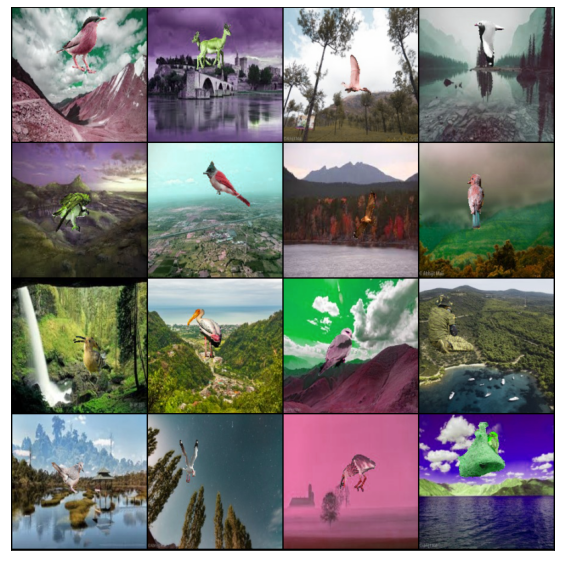

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 64, 64]              27
            Conv2d-2           [-1, 64, 64, 64]             256
DepthwiseSeparableConv2d-3           [-1, 64, 64, 64]               0
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]             576
            Conv2d-6          [-1, 128, 64, 64]           8,320
DepthwiseSeparableConv2d-7          [-1, 128, 64, 64]               0
              ReLU-8          [-1, 128, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]           1,152
           Conv2d-10          [-1, 128, 64, 64]          16,512
DepthwiseSeparableConv2d-11          [-1, 128, 64, 64]               0
      BatchNorm2d-12          [-1, 128, 64, 64]             256
           Conv2d-13          [-1, 128, 64, 64]           1,152
           Conv2d-14

In [0]:
import torch.nn as nn
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createMonocularModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# for name, param in cnn_model.named_parameters():
#     print(name)
#     print(param)

# for name, param in cnn_model.named_parameters():    
#     if "bn1" in name or "bn2" in name:
#         nn.init.constant_(param, 0)        
#     elif "weight" in name:
#         nn.init.kaiming_normal_(param, mode="fan_out", nonlinearity="relu")
#     elif "bias" in name:
#         nn.init.constant_(param, 0)

last_epoch = 1

if os.path.exists("/content/EVA/A15-PartB/finalmodelwithdata-Mask-128K.pt"):
    checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
        , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel("/content/EVA/A15-PartB/finalmodelwithdata-Mask-128K.pt")
    cnn_model.load_state_dict(model_state_dict)
    # optimizer.load_state_dict(optimizer_state_dict)
    last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)


sample = next(iter(train_loader))

imgs = sample[0][0]

# grid_tensor = torchvision.utils.make_grid(imgs, 2)
# grid_image = grid_tensor.permute(1, 2, 0)

utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()
# print(cnn_model)
# print(cnn_model.parameters())
train_model.showmodelsummary(model=cnn_model,input_size=[(4,3,64,64)])
# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=1, 
            verbose=True, threshold=0.01, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 7

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(cnn_model))

In [0]:
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(dice_loss)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 1/17500 [00:02<10:10:45,  2.09s/it]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.269629
IOU : 0.5467395276218318


  3%|▎         | 502/17500 [04:59<2:38:31,  1.79it/s]

Train Epoch: 1 [2000/280000 (3%)]	Loss: 0.291086
IOU : 0.5495048718070987


  6%|▌         | 1001/17500 [09:56<3:16:19,  1.40it/s]

Train Epoch: 1 [4000/280000 (6%)]	Loss: 0.117426
IOU : 0.7733972344437461


  9%|▊         | 1501/17500 [14:54<3:10:17,  1.40it/s]

Train Epoch: 1 [6000/280000 (9%)]	Loss: 0.218265
IOU : 0.6135281473621201


 11%|█▏        | 2002/17500 [19:51<2:24:27,  1.79it/s]

Train Epoch: 1 [8000/280000 (11%)]	Loss: 0.273904
IOU : 0.6268148537736502


 14%|█▍        | 2501/17500 [24:48<2:58:27,  1.40it/s]

Train Epoch: 1 [10000/280000 (14%)]	Loss: 0.229017
IOU : 0.6093151643566665


 17%|█▋        | 3002/17500 [29:45<2:15:10,  1.79it/s]

Train Epoch: 1 [12000/280000 (17%)]	Loss: 0.166380
IOU : 0.7079301476334598


 20%|██        | 3501/17500 [34:42<2:46:41,  1.40it/s]

Train Epoch: 1 [14000/280000 (20%)]	Loss: 0.154410
IOU : 0.7273553523712577


 23%|██▎       | 4002/17500 [39:40<2:06:03,  1.78it/s]

Train Epoch: 1 [16000/280000 (23%)]	Loss: 0.202135
IOU : 0.6405075114812797


 26%|██▌       | 4501/17500 [44:37<2:34:34,  1.40it/s]

Train Epoch: 1 [18000/280000 (26%)]	Loss: 0.208662
IOU : 0.614713833095951


 29%|██▊       | 5001/17500 [49:35<2:28:44,  1.40it/s]

Train Epoch: 1 [20000/280000 (29%)]	Loss: 0.198050
IOU : 0.6492131712293259


 31%|███▏      | 5501/17500 [54:32<2:22:40,  1.40it/s]

Train Epoch: 1 [22000/280000 (31%)]	Loss: 0.203212
IOU : 0.6616064330703847


 34%|███▍      | 6002/17500 [59:29<1:47:13,  1.79it/s]

Train Epoch: 1 [24000/280000 (34%)]	Loss: 0.164606
IOU : 0.6770279021313738


 37%|███▋      | 6501/17500 [1:04:26<2:10:53,  1.40it/s]

Train Epoch: 1 [26000/280000 (37%)]	Loss: 0.275950
IOU : 0.5963717407228465


 40%|████      | 7001/17500 [1:09:24<2:04:55,  1.40it/s]

Train Epoch: 1 [28000/280000 (40%)]	Loss: 0.234589
IOU : 0.6231994966243218


 43%|████▎     | 7501/17500 [1:14:21<1:59:01,  1.40it/s]

Train Epoch: 1 [30000/280000 (43%)]	Loss: 0.157802
IOU : 0.6669692038057086


 43%|████▎     | 7611/17500 [1:15:26<1:37:59,  1.68it/s]

In [0]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-128K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)